In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import sklearn.decomposition as skde
from sklearn import preprocessing

In [2]:
# read the diabetic data to pandas dataframe
diabetes = pd.read_csv("diabetes_cleaned.csv", index_col = 'encounter_id')

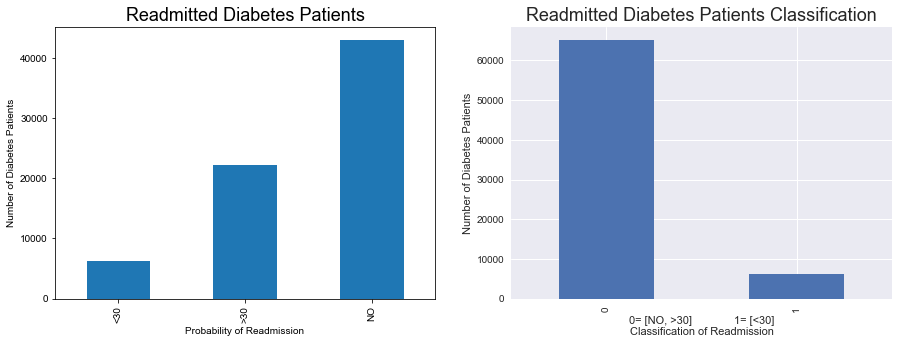

In [3]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
diabetes.groupby('readmitted').size().plot(kind='bar')
plt.title('Readmitted Diabetes Patients', fontsize= 18)
plt.xlabel('Probability of Readmission')
plt.ylabel("Number of Diabetes Patients")
mpl.style.use("seaborn")

plt.subplot(1, 2, 2)
diabetes.groupby('label').size().plot(kind='bar')
plt.title('Readmitted Diabetes Patients Classification', fontsize= 18)
plt.xlabel("0= [NO, >30]              1= [<30]\nClassification of Readmission")
plt.ylabel("Number of Diabetes Patients")
mpl.style.use("seaborn")

plt.show()

In [4]:
# drop cloumns we don't need for our model
diabetes = diabetes.drop(['diag_1','diag_2','diag_3','admission_type_id','patient_nbr', 'readmitted', 'age'], axis =1)

# drop label column after save it as separete file (Lebels.csv)
#diabetes = diabetes.drop('label', axis=1)

In [5]:
# convert [discharge_disposition_id, admission_source_id] to string columns ... for more details see IDs_mapping.csv file
diabetes.discharge_disposition_id = diabetes.discharge_disposition_id.astype(str)
diabetes.admission_source_id = diabetes.admission_source_id.astype(str)

In [6]:
categorical_columns = []

for col in diabetes.columns:
    if diabetes[col].dtype == object:
        categorical_columns.append(col)

race


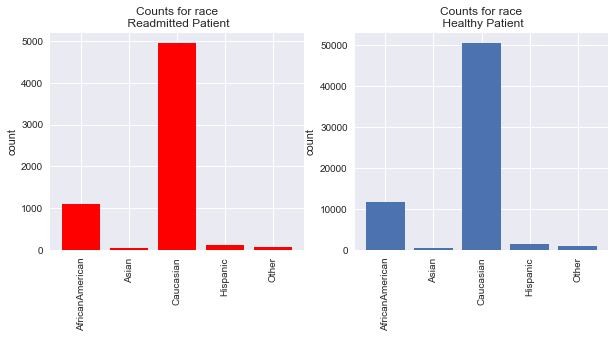

gender


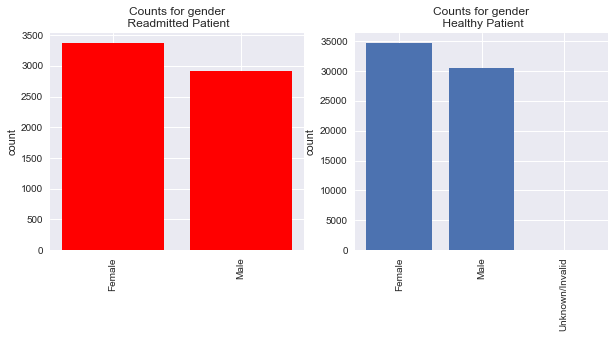

discharge_disposition_id


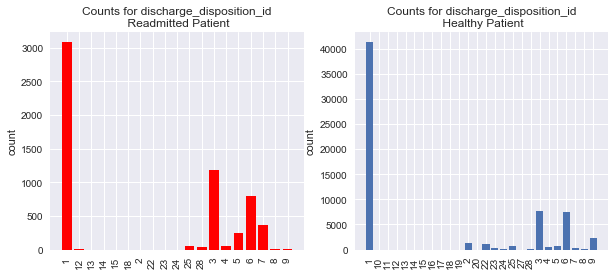

admission_source_id


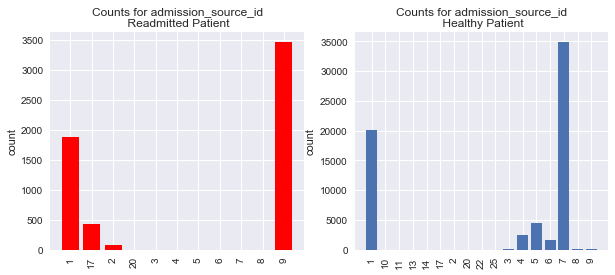

max_glu_serum


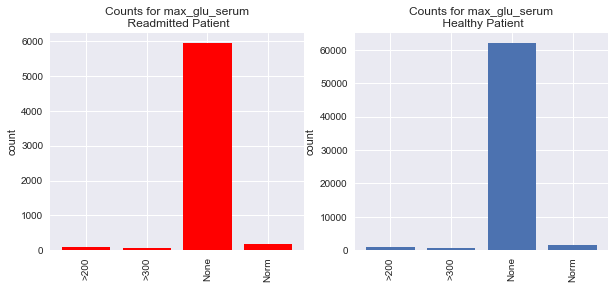

A1Cresult


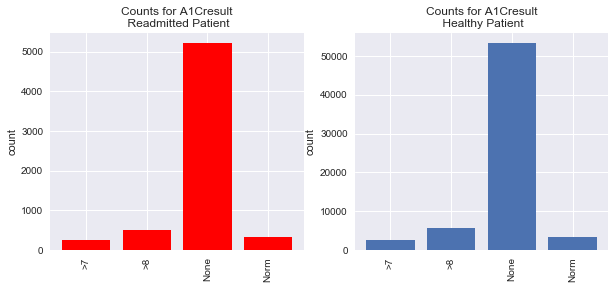

metformin


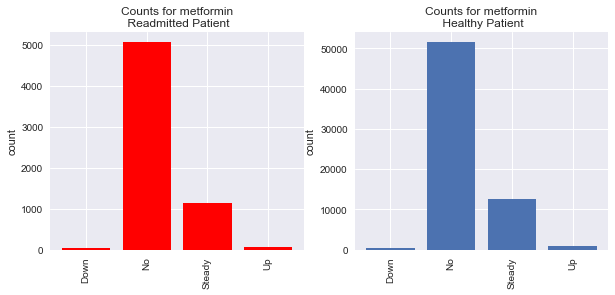

repaglinide


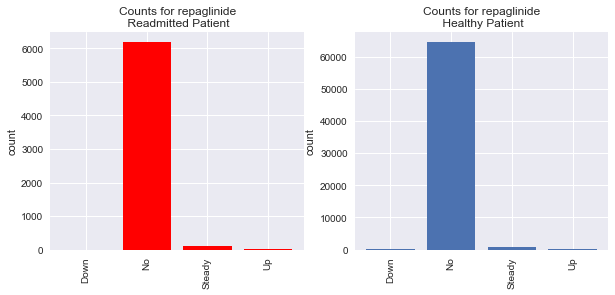

nateglinide


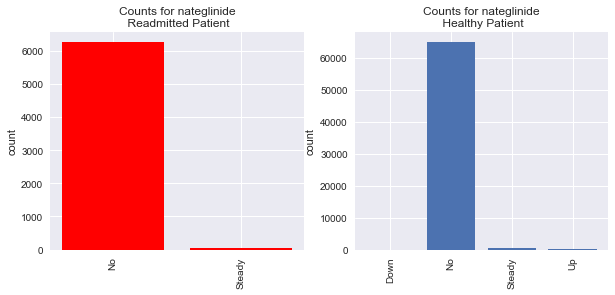

chlorpropamide


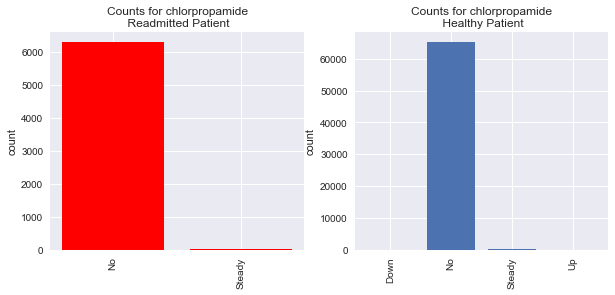

glimepiride


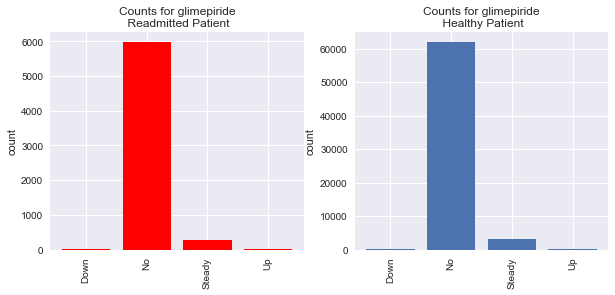

acetohexamide


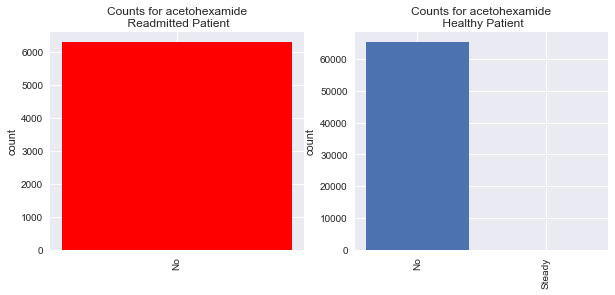

glipizide


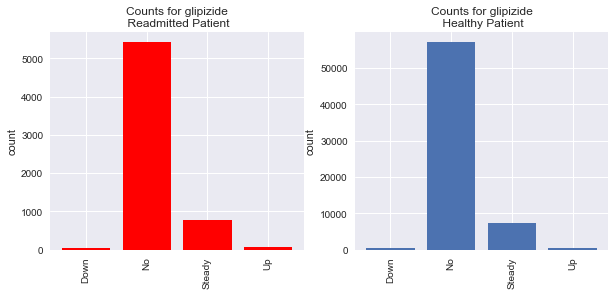

glyburide


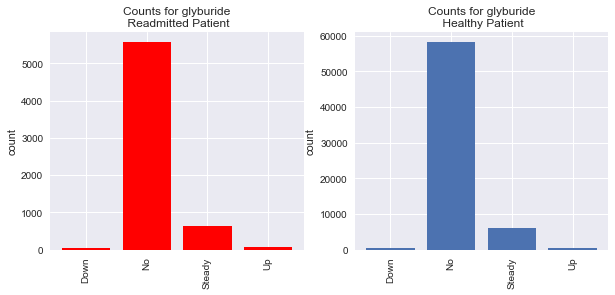

tolbutamide


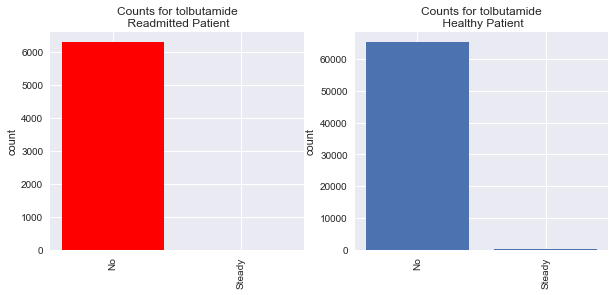

pioglitazone


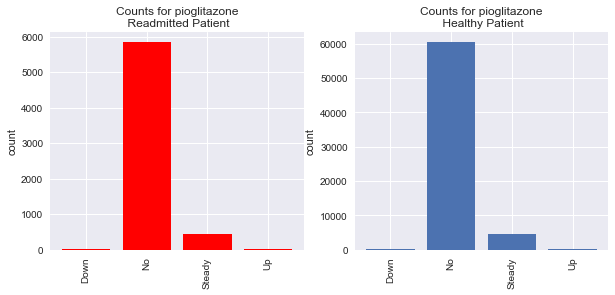

rosiglitazone


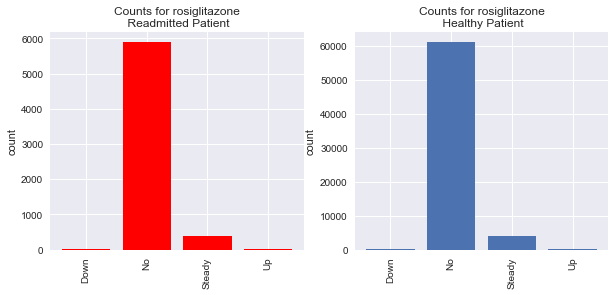

acarbose


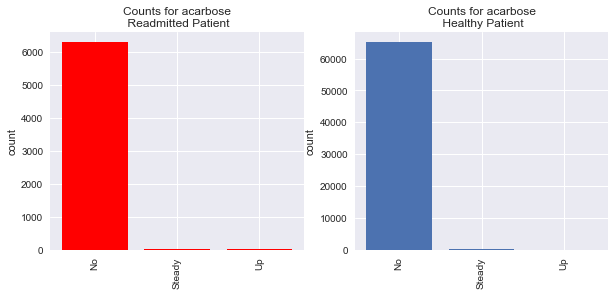

miglitol


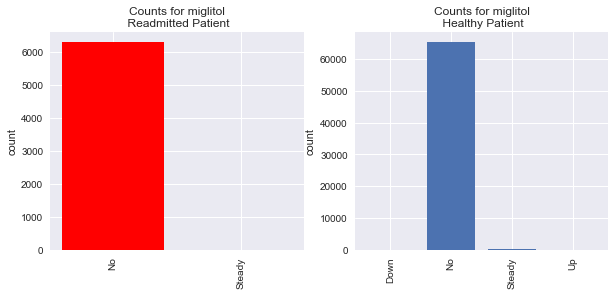

troglitazone


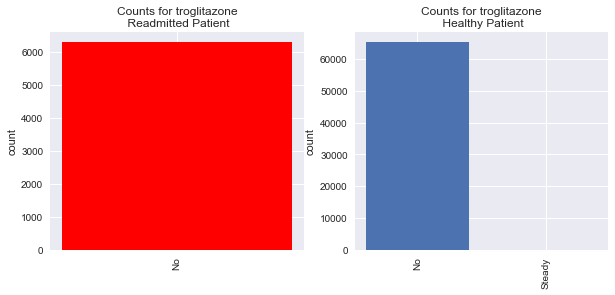

tolazamide


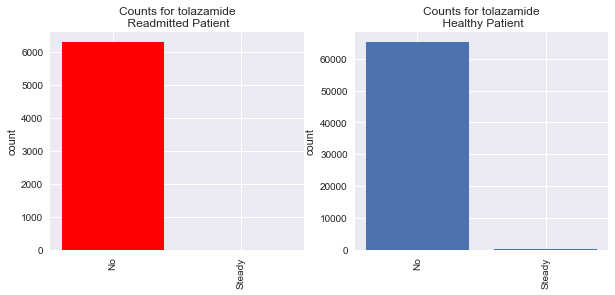

insulin


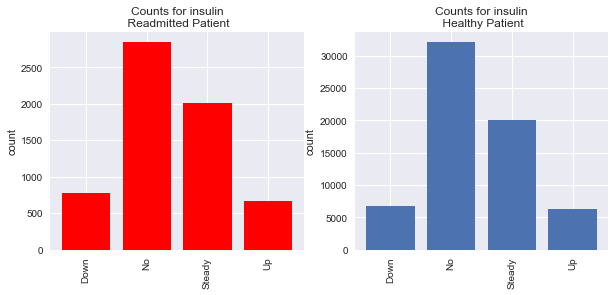

glyburide-metformin


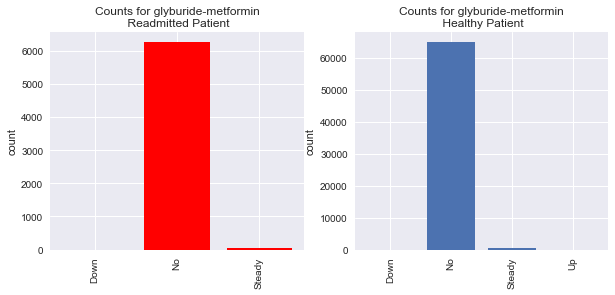

glipizide-metformin


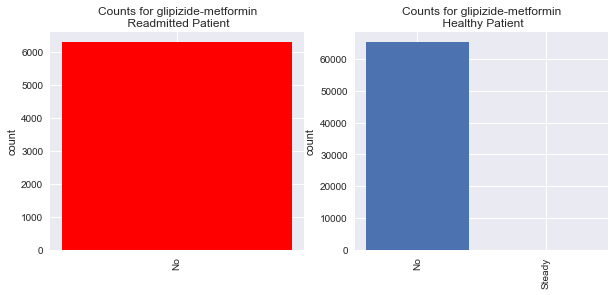

glimepiride-pioglitazone


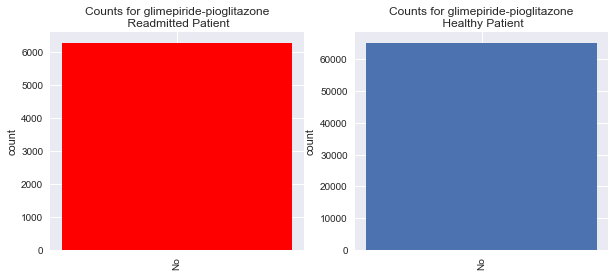

metformin-rosiglitazone


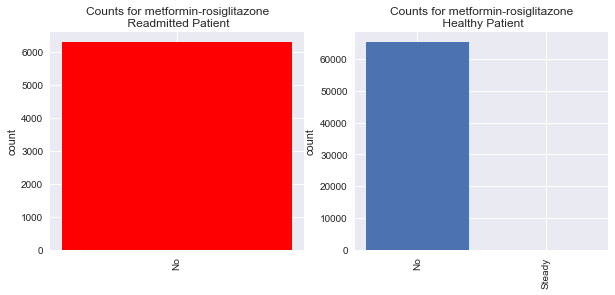

metformin-pioglitazone


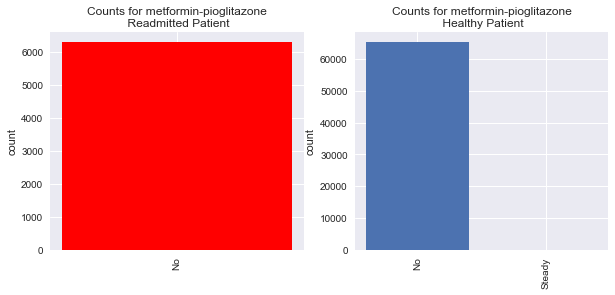

change


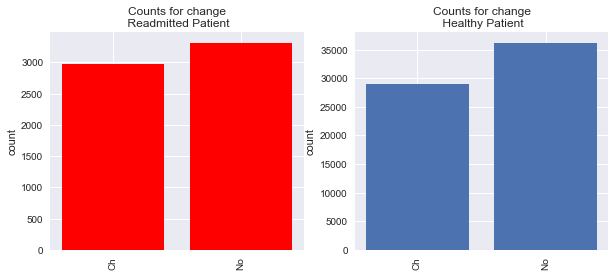

diabetesMed


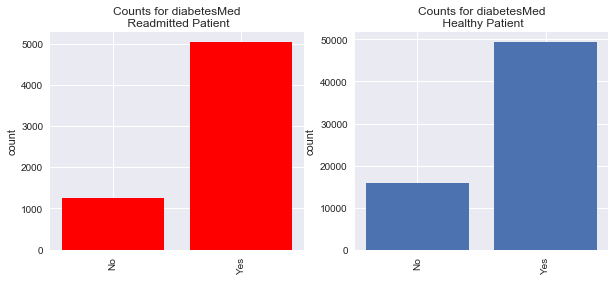

new_age


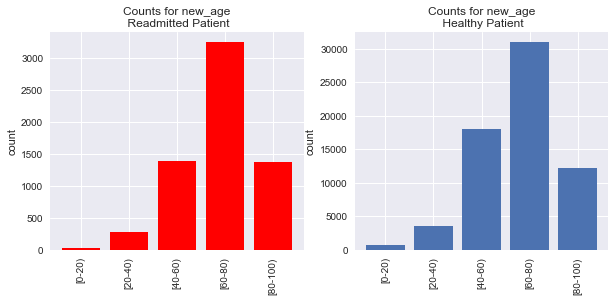

primary diagnosis


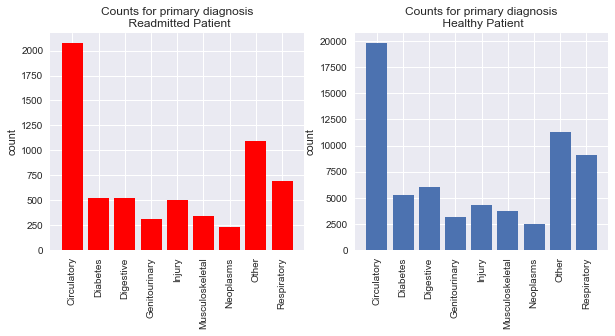

second diagnosis


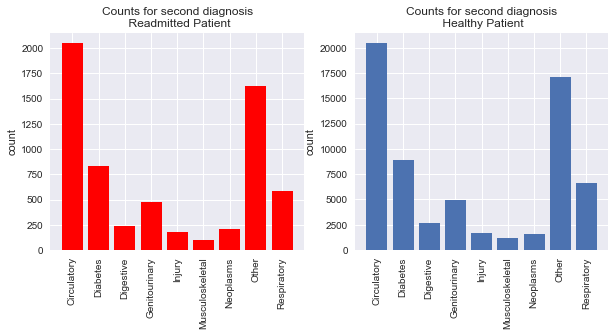

third diagnosis


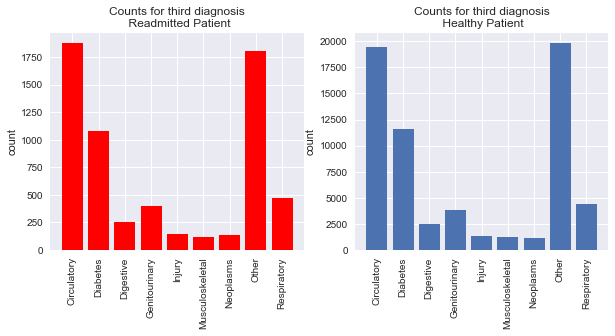

admission_type


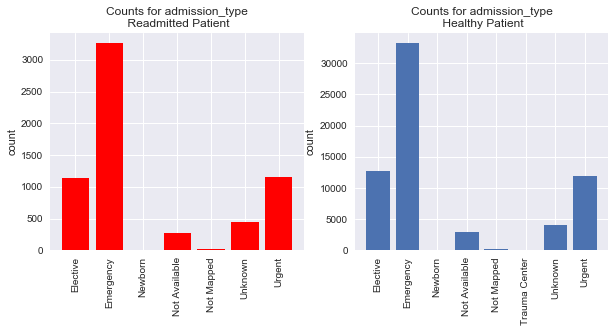

In [7]:
import numpy as np
cat_cols = categorical_columns
diabetes
diabetes['dummy'] = np.ones(shape = diabetes.shape[0])
for col in cat_cols:
    print(col)
    counts = diabetes[['dummy', 'label', col]].groupby(['label', col], as_index = False).count()
    temp = counts[counts['label'] == 1][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['label'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy, color= "red")
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Readmitted Patient')
    plt.ylabel('count')
    mpl.style.use("seaborn")
    plt.subplot(1, 2, 2)
    temp = counts[counts['label'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Healthy Patient')
    plt.ylabel('count')
    mpl.style.use("seaborn")
    plt.show()

In [8]:
nomeric_columns = []

for col in diabetes.columns:
    if diabetes[col].dtype == 'int64':
        nomeric_columns.append(col)

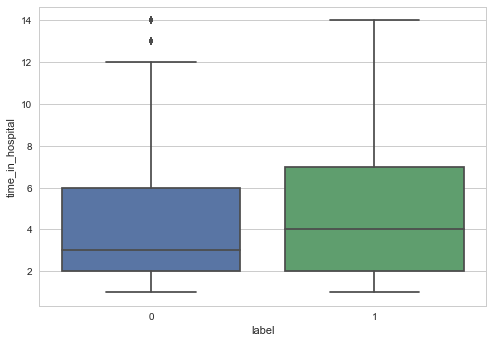

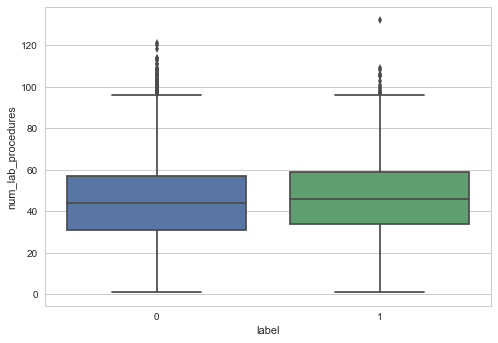

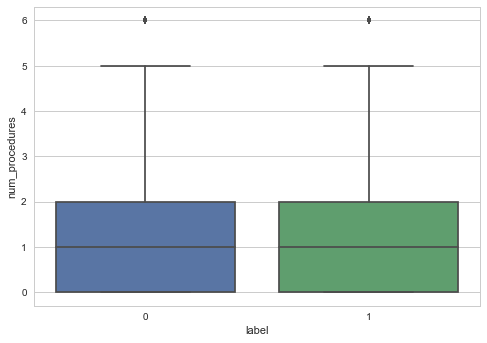

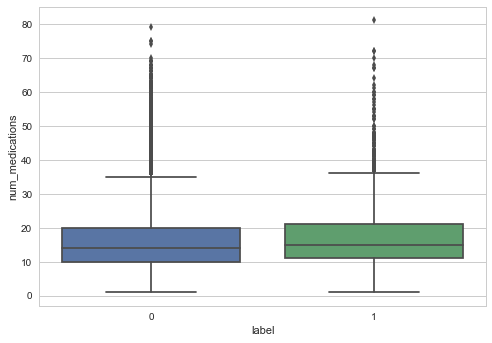

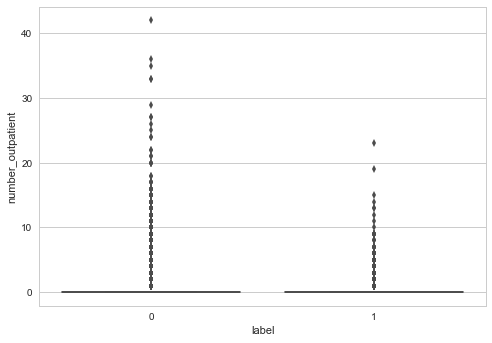

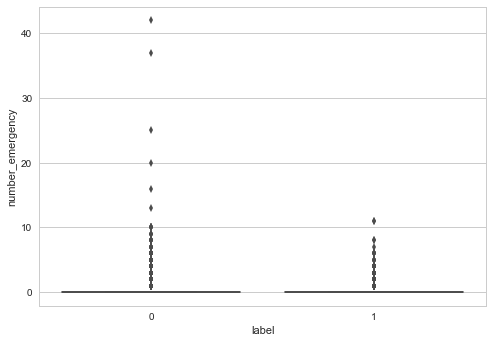

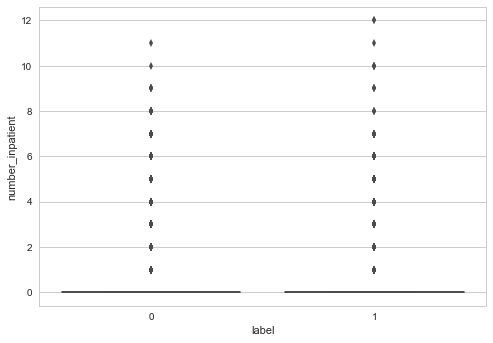

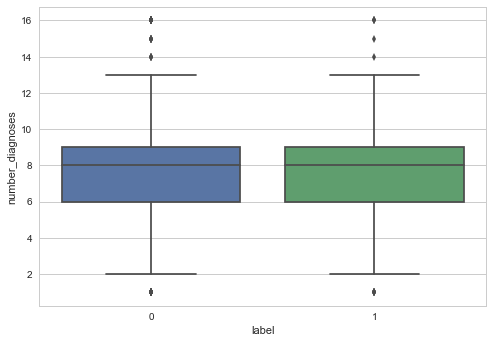

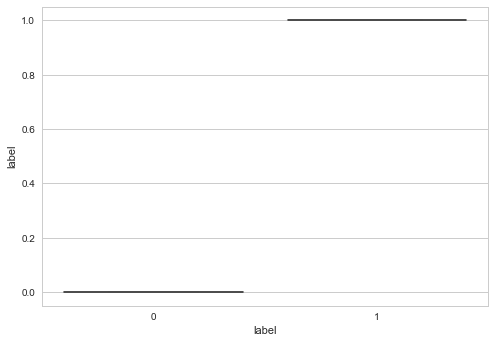

In [9]:
def plot_box(diabetes, cols, col_x = 'label'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=diabetes)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = nomeric_columns
plot_box(diabetes, num_cols)